<a href="https://colab.research.google.com/github/bowwow-carrot/-_-/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# 넘파이를 사용. 넘파이는 배열이지만 행렬의 성격을 가진다.

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
"""
x = [0,1,2,3,4]
y = [1,3,5,7,9]
numpy로 만듬. numpy로 만들지 않으면 리스트연산만 된다.
행렬로 인식함으로 수치형 계산이 되도록 한다.
"""
x = np.array([0,1,2,3,4], dtype='float64') #float64 는 64비트 실수형
y = x * 2 +1
print(y)

# 리스트로 할 경우
test_x = list(range(5))
test_y = test_x * 2
print(test_y)

# 참조 리스트로 작성하는 경우
test_y2 = [i*2+1 for i in test_x]
print(test_y2)
# numpy 타입으로 들어가야 하는 이슈가 있음.
print(type(x),type(y))

print(test_y2 * 2)

[1. 3. 5. 7. 9.]
[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
[1, 3, 5, 7, 9]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1, 3, 5, 7, 9, 1, 3, 5, 7, 9]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input)
print(train_input.shape)
train_input = train_input.reshape(-1,1) #변경된 배열의 ‘-1’ 위치의 차원은 원래 배열의 길이와 남은 차원으로 부터 추정
print(train_input)
print(train_input.shape)

print(test_input)
test_input = test_input.reshape(-1,1)
print(test_input)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
(42,)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
(42, 1)
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[150]]))
#값을 벗어난 농어의 무게 예측,

[1033.33333333]


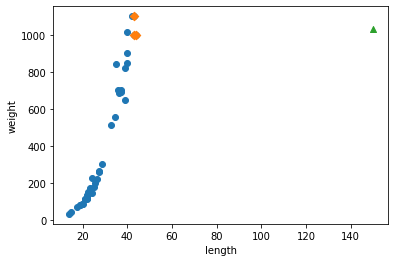

In [ ]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[150]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(150, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[150]]))
print(lr.coef_, lr.intercept_)
#데이터와 잘맞는 기울기(가중치) w 와 편차(편향) b
# y = wx + b

[5143.55309959]
[39.01714496] -709.0186449535477


<function matplotlib.pyplot.show>

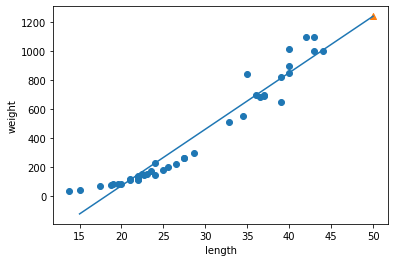

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15, 50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 내가 찾는 값은 50의 무게를 가진 농어의 길이이다.
# 그렇기 때문에 15 ~ 50의 무게에 대한 1차방정식 그래프를 그린다. [15,50]
# 다음 값은 15*w + b 로써, y값을 의미한다.

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [ ]:
"""
결정계수의 점수 값
0.9398463339976039
0.8247503123313558

결정계수가 0.93이므로 사실상 높은 결과값을 가졌다고 하지 못한다.
논문에서는 95% 신뢰구간에서 p ~~~~
이후 테스트 셋을 통해 알아본 결과값으로는 과소적합이라 할 수 있다.

데이터와 다른 1차 선형그래프를 통한 회귀함수의 한계.
"""
#결정계수 R**2 점수를 확인.
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 훈련한 데이터를 통해 결정계수를 먼저 확인을 해본다.
# 훈련한 데이터가 잘 매칭이 되는지, 훈련되지 않는 데이터인 test데이터를 통해 점수를 확인한다.


0.9398463339976039
0.8247503123313558


In [ ]:
# 다항회귀
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape,test_poly.shape)
print(train_poly)

(42, 2) (14, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [ ]:
lr.fit(train_poly, train_target)
print(lr.predict([[150**2,150]]))
print(lr.coef_, lr.intercept_)

[19704.83392493]
[  1.01433211 -21.55792498] 116.05021078278276


<function matplotlib.pyplot.show>

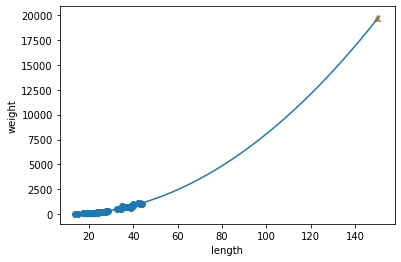

In [ ]:
point = np.arange(15,152) # 조금더 그래프를 늘림
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.558*point + 116.05)
plt.scatter(150,lr.predict([[150**2,150]]) , marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [ ]:
#결정계수 R**2 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
